In [2]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau
from pandas_profiling import ProfileReport

In [3]:
#reading dataset

data = pd.read_csv("ckdu_dataset/CKDU_14m.csv", na_values=['#DIV/0!'])

In [4]:
#dropping columns that have more than 80% of empty values

data.dropna(axis=1, how="any", thresh=.8, subset=None, inplace=True)

In [5]:
#filling the NaN values with mean of that column

data.fillna(data.mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp/ipykernel_15712/1474580016.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [7]:
#converting categorical data types "Filtered water" and "Rain water" in "water source" column in to int

data['Water source'].replace(['Filtered water', 'Rain water'],[0, 1], inplace=True)

In [9]:
#converting categorical data types "M" and "F" in "gender" column in to int

data['gender'].replace(['M', 'F'],[0, 1], inplace=True)

In [12]:
#calculating correlations using kendall correlation coefficient
#reason :-  Kendall's rank coefficient (for non linear relationship) 
#link to read more about kendall's rank coefficient - https://medium.com/analytics-vidhya/kendall-rank-correlation-python-19524cb0e9a0

corr = data.corr(method='kendall')
corr

patientId       age    gender  foPeriod    weight  weight_1  \
patientId      1.000000 -0.004015 -0.114631 -0.860655  0.042050  0.047311   
age           -0.004015  1.000000  0.022690  0.010154 -0.057255 -0.037274   
gender        -0.114631  0.022690  1.000000  0.079906 -0.109396 -0.128289   
foPeriod      -0.860655  0.010154  0.079906  1.000000 -0.075338 -0.076661   
weight         0.042050 -0.057255 -0.109396 -0.075338  1.000000  0.908671   
...                 ...       ...       ...       ...       ...       ...   
OD_7           0.117810  0.074274 -0.209011 -0.118232  0.234305  0.245487   
OD_9           0.221854  0.083118 -0.288820 -0.222943  0.264492  0.276343   
OD_11          0.117463  0.073912 -0.209051 -0.117867  0.234722  0.245904   
Avg OD         0.227213  0.080042 -0.325636 -0.237168  0.295384  0.285767   
water_intake   0.015274 -0.141810 -0.228013 -0.002032  0.019311  0.024120   

              weight_2  weight_3  weight_4  weight_6  ...   OD_L_11   OD_R_11  \
patientId     0.024294  0.023404  0.018720  0.050927  ...  0.015170 -0.001245   
age          -0.043502 -0.041328 -0.034555 -0.018278  ...  0.145434  0.082634   
gender       -0.103905 -0.103657 -0.091567 -0.065345  ... -0.275671 -0.237626   
foPeriod     -0.051000 -0.053290 -0.049124 -0.081033  ... -0.013742  0.020695   
weight        0.886492  0.898513  0.883282  0.856724  ...  0.217154  0.227752   
...                ...       ...       ...       ...  ...       ...       ...   
OD_7          0.239473  0.227186  0.236579  0.203599  ...  0.304733  0.367245   
OD_9          0.249308  0.260716  0.265405  0.233829  ...  0.221657  0.246988   
OD_11         0.239889  0.227599  0.236993  0.204007  ...  0.304364  0.366888   
Avg OD        0.267992  0.277688  0.275109  0.261852  ...  0.233360  0.238259   
water_intake  0.035977  0.015734  0.009266 -0.016804  ... -0.032342 -0.012174   

                  OD_1      OD_3      OD_5      OD_7      OD_9     OD_11  \
patientId     0.117202  0.195879  0.221582  0.117810  0.221854  0.117463   
age          -0.006314  0.087951  0.104834  0.074274  0.083118  0.073912   
gender       -0.290700 -0.307521 -0.253977 -0.209011 -0.288820 -0.209051   
foPeriod     -0.115152 -0.203683 -0.234501 -0.118232 -0.222943 -0.117867   
weight        0.291390  0.246689  0.246898  0.234305  0.264492  0.234722   
...                ...       ...       ...       ...       ...       ...   
OD_7          0.236367  0.308702  0.416542  1.000000  0.575366  0.999810   
OD_9          0.369882  0.477410  0.794536  0.575366  1.000000  0.575102   
OD_11         0.236411  0.309137  0.416997  0.999810  0.575102  1.000000   
Avg OD        0.624039  0.726019  0.664339  0.388586  0.629037  0.388846   
water_intake  0.108132  0.102784  0.090099  0.154742  0.143246  0.154993   

                Avg OD  water_intake  
patientId     0.227213      0.015274  
age           0.080042     -0.141810  
gender       -0.325636     -0.228013  
foPeriod     -0.237168     -0.002032  
weight        0.295384      0.019311  
...                ...           ...  
OD_7          0.388586      0.154742  
OD_9          0.629037      0.143246  
OD_11         0.388846      0.154993  
Avg OD        1.000000      0.095203  
water_intake  0.095203      1.000000  

[124 rows x 124 columns]

<AxesSubplot:>

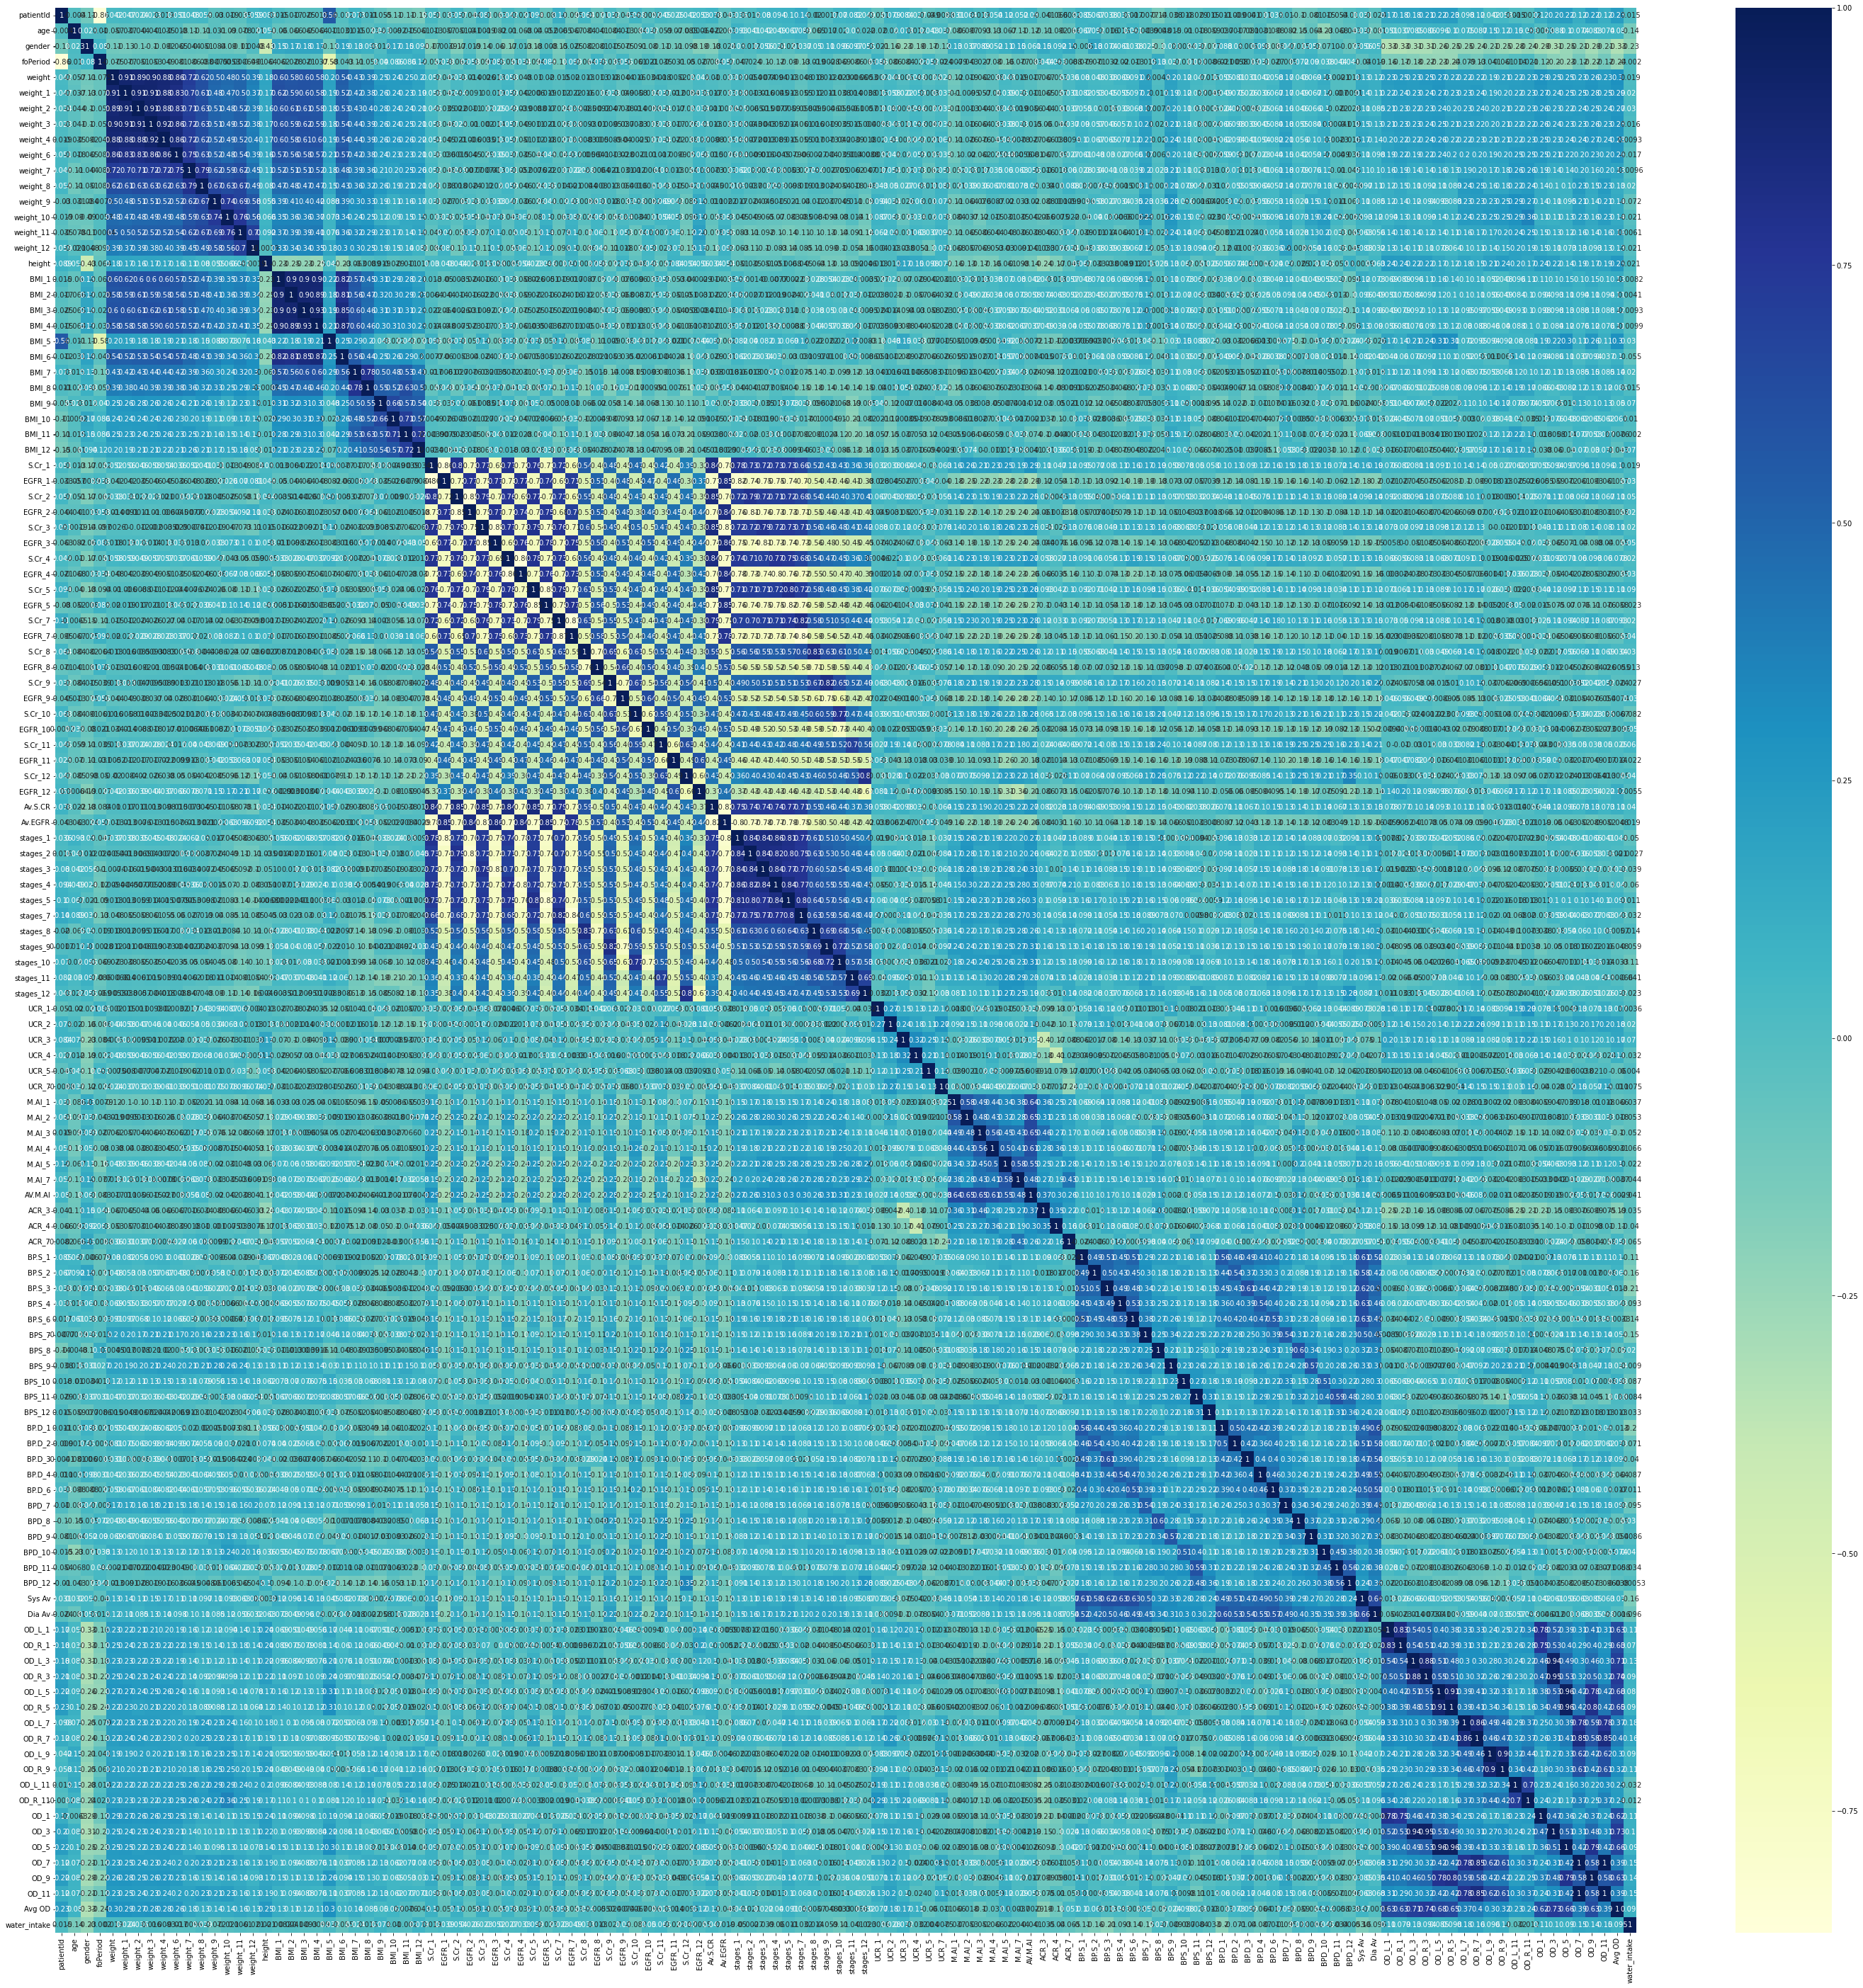

In [18]:
#plotting correlation matrix

rcParams['figure.figsize'] = 50,50
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

<AxesSubplot:>

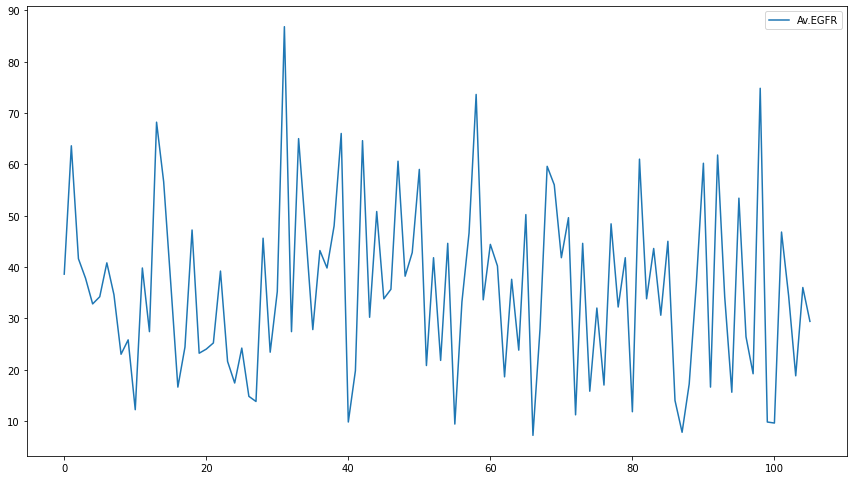

In [15]:
#plotting only the avg EGFR values of all the patients

data["Av.EGFR"].plot(legend=True)

<AxesSubplot:>

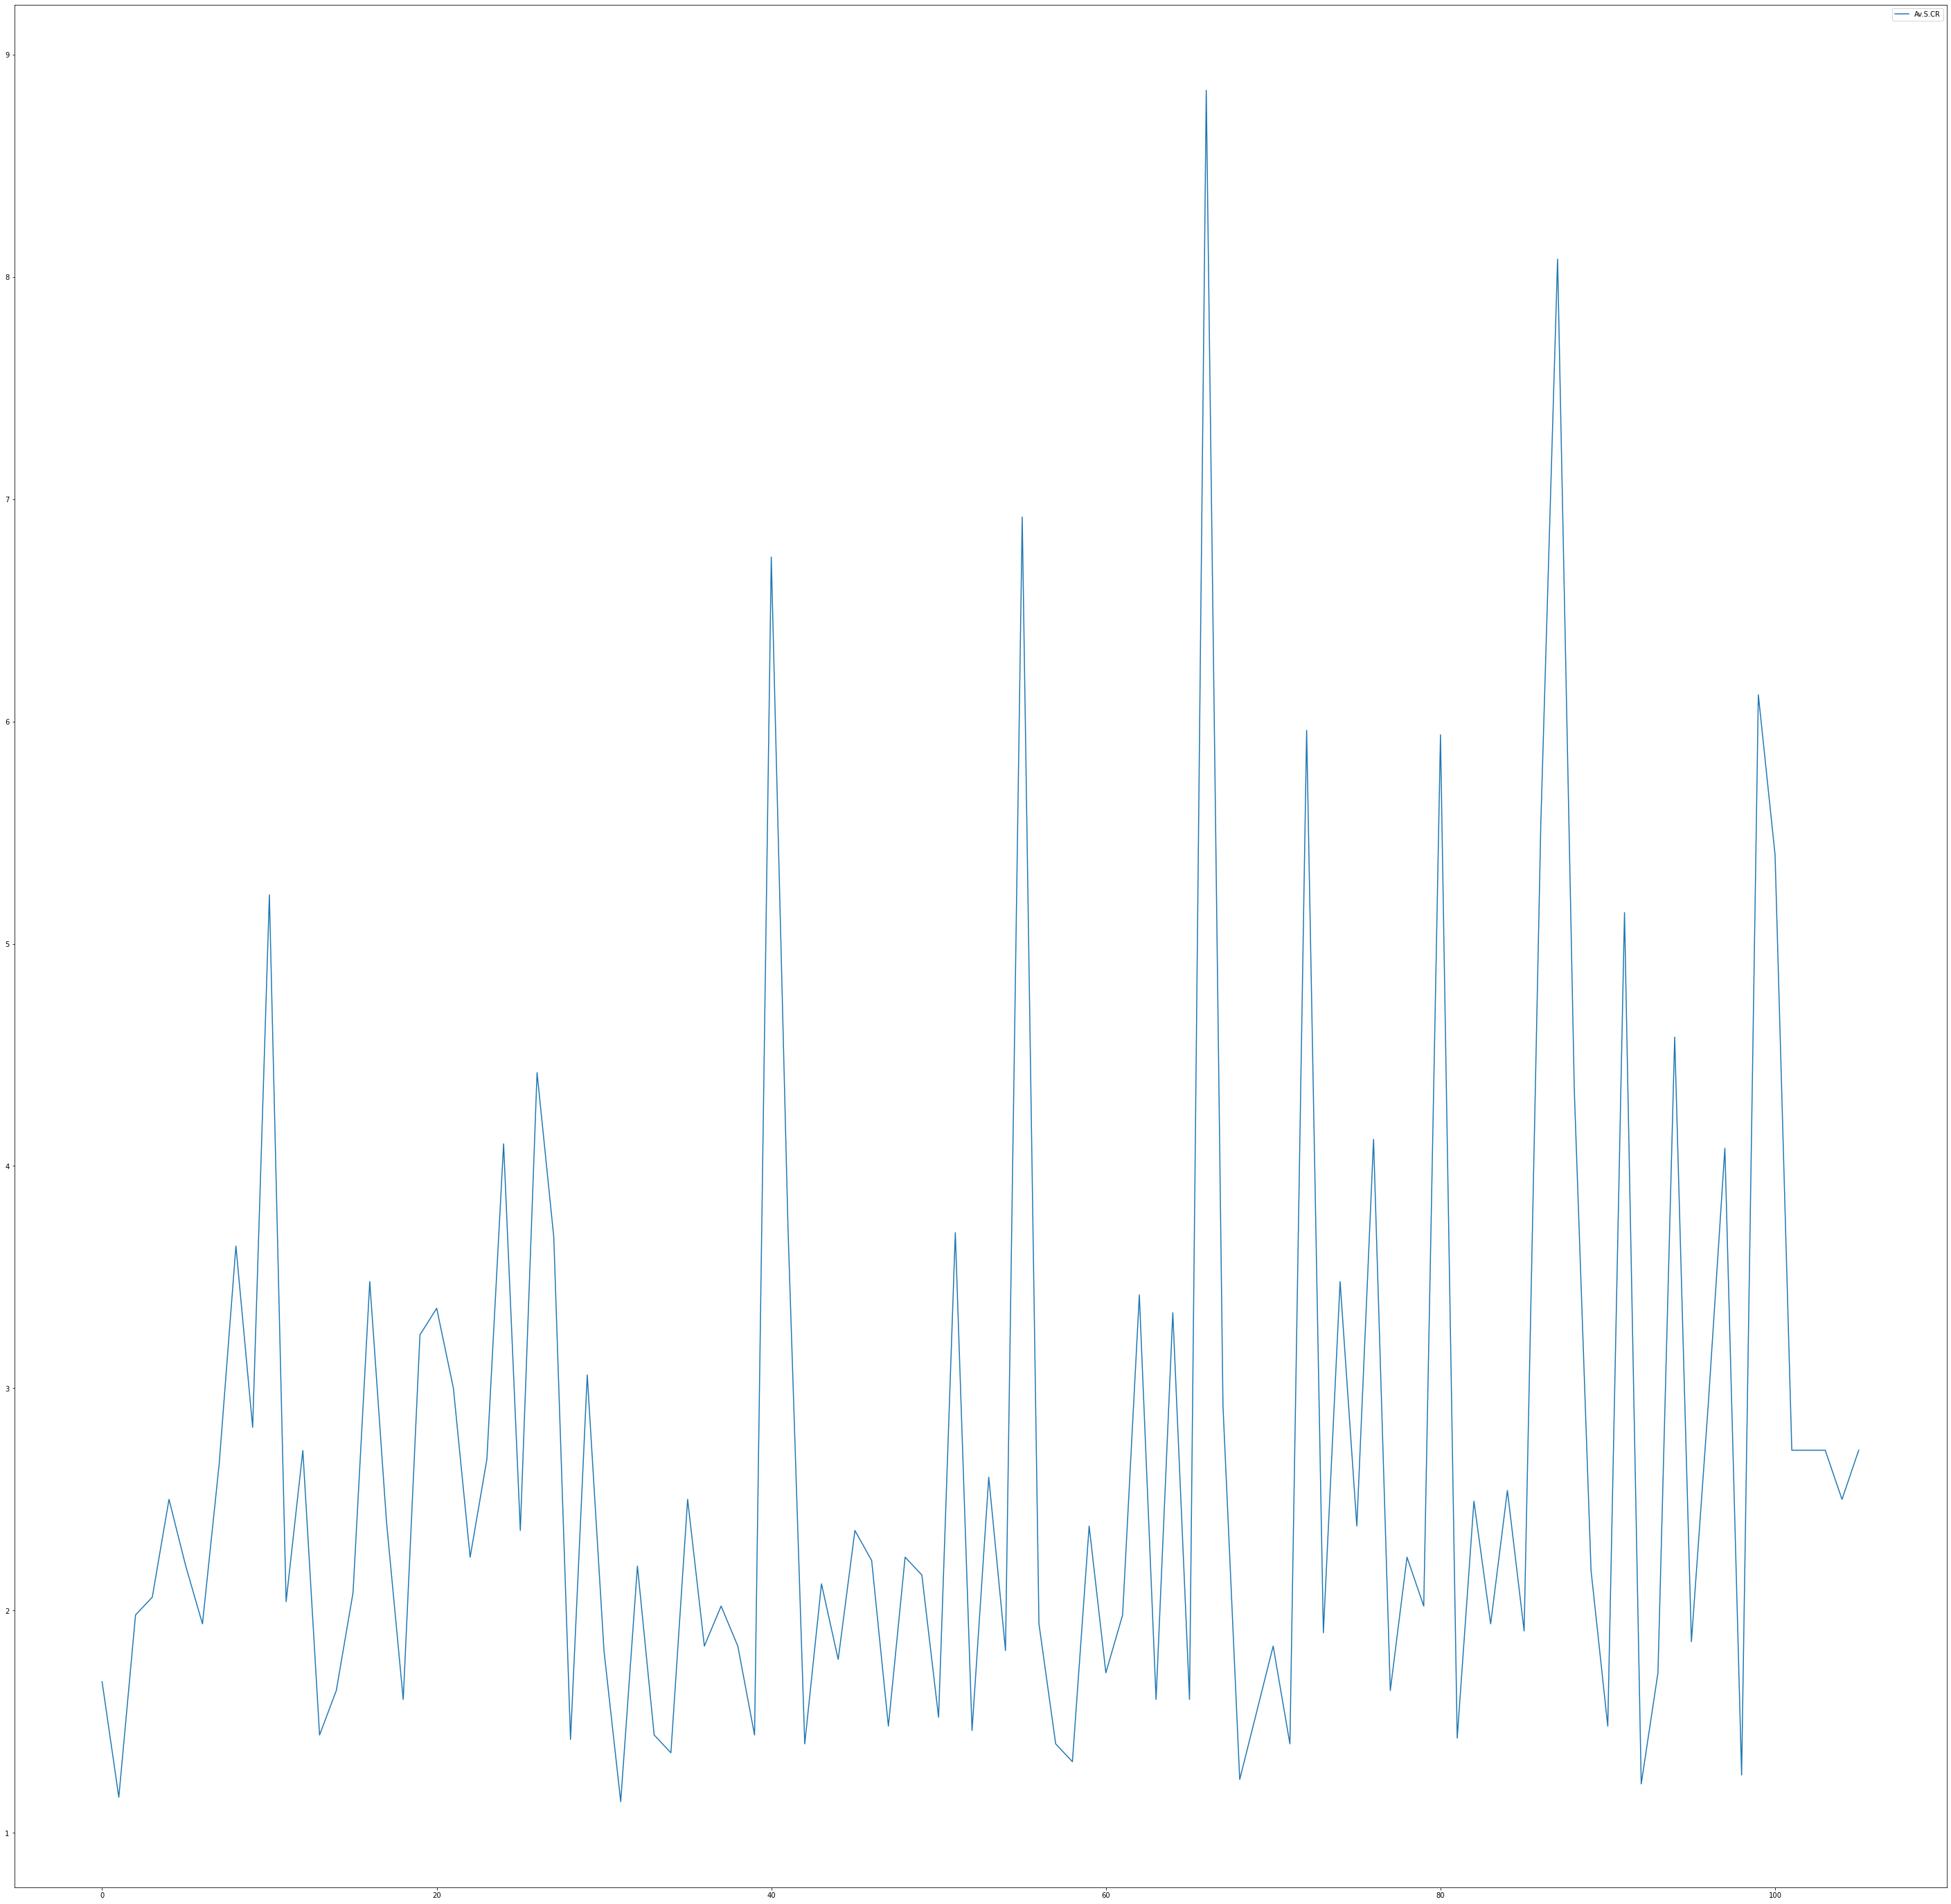

In [20]:
#plotting only the avg SCR values of all the patients

data["Av.S.CR"].plot(legend=True)

<AxesSubplot:xlabel='patientId'>

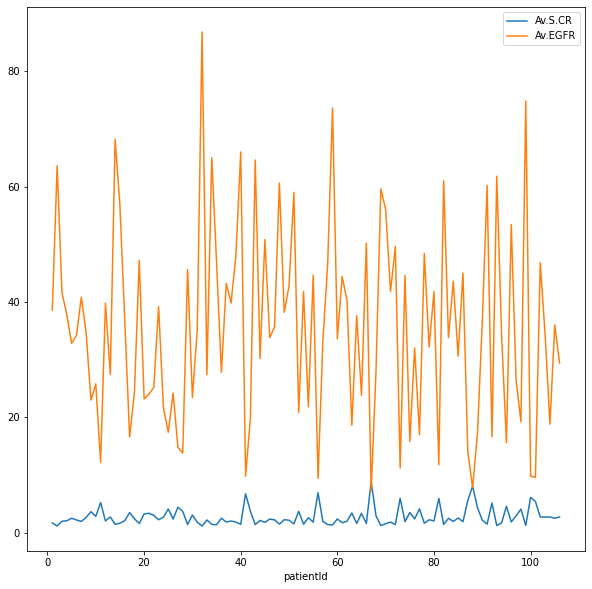

In [22]:
#plotting fluctuation of Avg Scr and Avg EGFR over time in same graph

data.plot(x="patientId", y=["Av.S.CR", "Av.EGFR"],
        kind="line", figsize=(10, 10))

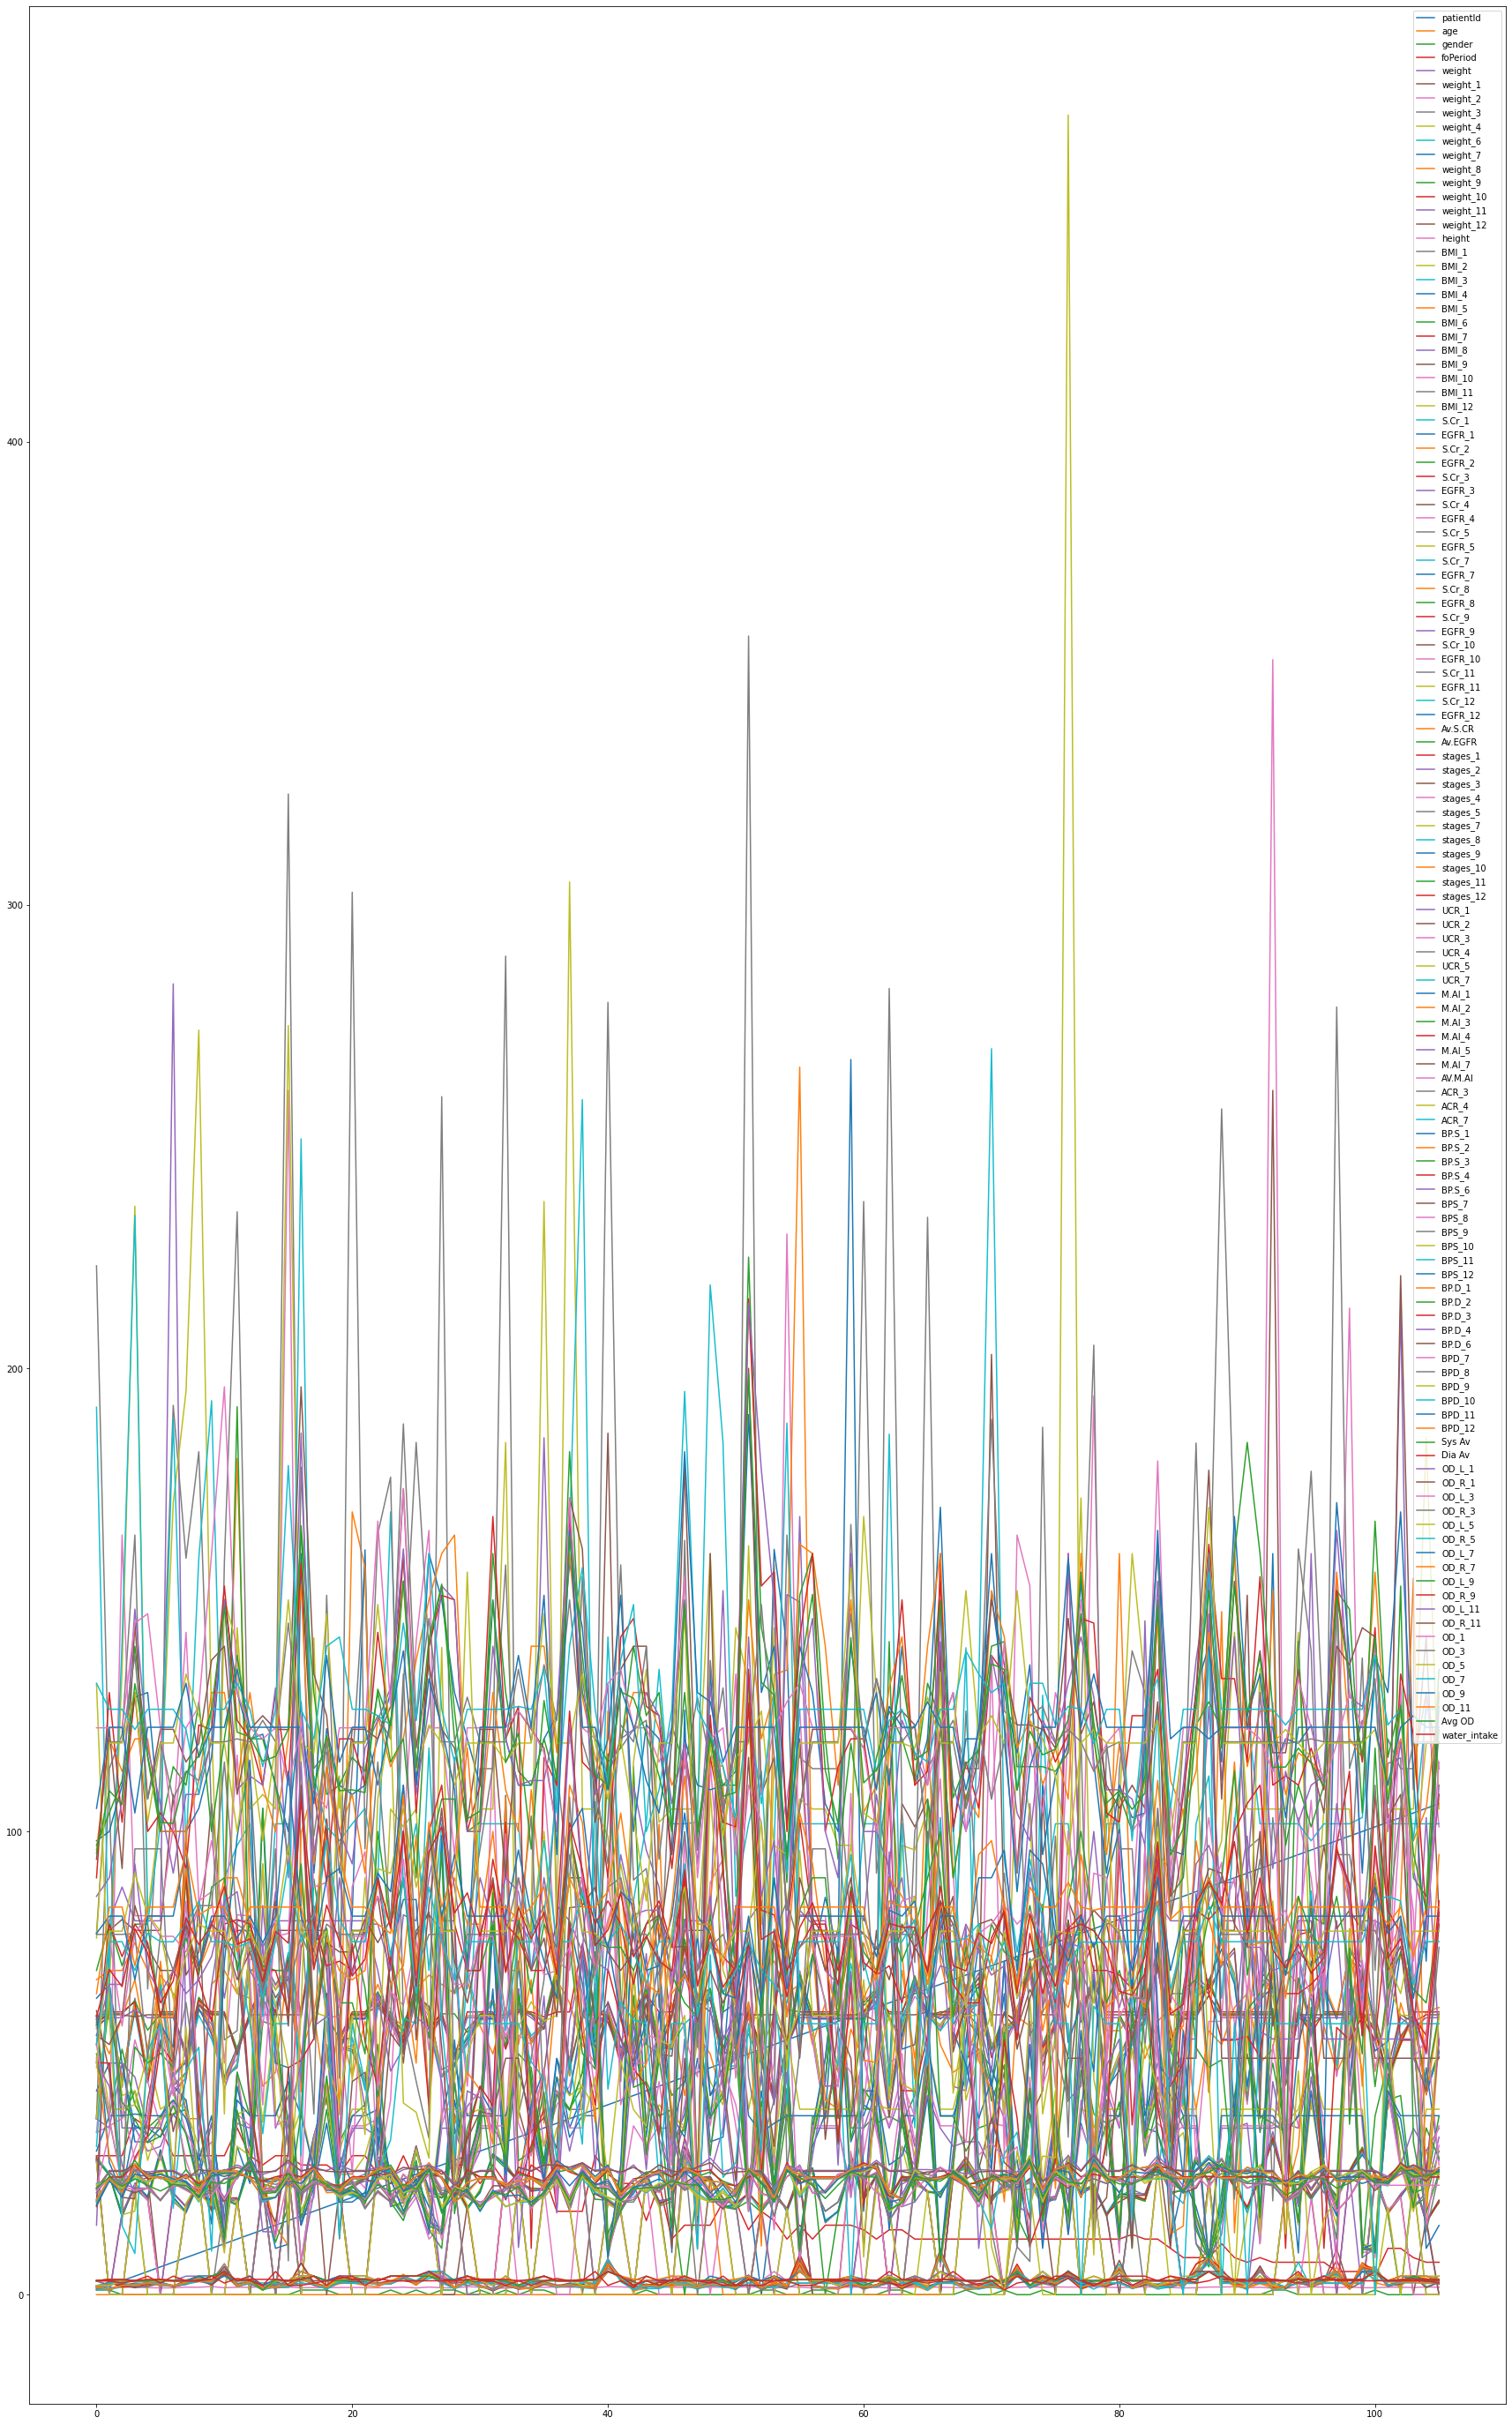

In [16]:
#plotting all the values
ax = data.plot(figsize=(30, 50))

In [25]:
#time series analysis reports
#uncomment following code if this didn't work
# import sys

# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

profile = ProfileReport(data)
profile